## Penguins

- Adelie, Gentoo 구분하기

In [157]:
import seaborn as sns

df = sns.load_dataset('penguins')
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [158]:
cond1 = df['species'].isin(['Adelie', 'Gentoo'])
df_input = df.loc[cond1]
df_input

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [159]:
df_input.info()

<class 'pandas.core.frame.DataFrame'>
Index: 276 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            276 non-null    object 
 1   island             276 non-null    object 
 2   bill_length_mm     274 non-null    float64
 3   bill_depth_mm      274 non-null    float64
 4   flipper_length_mm  274 non-null    float64
 5   body_mass_g        274 non-null    float64
 6   sex                265 non-null    object 
dtypes: float64(4), object(3)
memory usage: 17.2+ KB


In [160]:
df_input.drop('sex', axis=1, inplace=True)

/var/folders/rq/t18jlxz1147bl8w5xrw6jst00000gn/T/ipykernel_92098/2200087050.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_input.drop('sex', axis=1, inplace=True)


In [161]:
df_input.dropna(inplace=True)

/var/folders/rq/t18jlxz1147bl8w5xrw6jst00000gn/T/ipykernel_92098/3225655175.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_input.dropna(inplace=True)


In [162]:
df_input

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0
...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0


In [163]:
data_input = df_input.loc[:, 'island':'body_mass_g']
data_target = df_input.loc[:, ['species']]
print(data_input.shape, data_target.shape)

(274, 5) (274, 1)


In [164]:
data_input['island'] = data_input['island'].astype('category')

In [165]:
data_input.info()

<class 'pandas.core.frame.DataFrame'>
Index: 274 entries, 0 to 343
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   island             274 non-null    category
 1   bill_length_mm     274 non-null    float64 
 2   bill_depth_mm      274 non-null    float64 
 3   flipper_length_mm  274 non-null    float64 
 4   body_mass_g        274 non-null    float64 
dtypes: category(1), float64(4)
memory usage: 11.1 KB


In [166]:
data_input['island'].dtypes

CategoricalDtype(categories=['Biscoe', 'Dream', 'Torgersen'], ordered=False, categories_dtype=object)

In [167]:
data_input['island'] = data_input['island'].cat.rename_categories([0,1,2])

In [168]:
data_input['island'].dtypes

CategoricalDtype(categories=[0, 1, 2], ordered=False, categories_dtype=int64)

In [169]:
data_input

,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,2,39.1,18.7,181.0,3750.0
1,2,39.5,17.4,186.0,3800.0
2,2,40.3,18.0,195.0,3250.0
4,2,36.7,19.3,193.0,3450.0
5,2,39.3,20.6,190.0,3650.0
...,...,...,...,...,...
338,0,47.2,13.7,214.0,4925.0
340,0,46.8,14.3,215.0,4850.0
341,0,50.4,15.7,222.0,5750.0
342,0,45.2,14.8,212.0,5200.0


In [170]:
df_mean = data_input.loc[:, 'bill_length_mm':'body_mass_g'].mean()
df_mean
df_std= data_input.loc[:, 'bill_length_mm':'body_mass_g'].std()
df_std

bill_length_mm         5.195566
bill_depth_mm          2.013410
flipper_length_mm     15.047938
body_mass_g          835.933105
dtype: float64

In [171]:
data_input.loc[:, 'bill_length_mm':'body_mass_g'] = (data_input.loc[:, 'bill_length_mm':'body_mass_g'] - df_mean) / df_std

In [172]:
data_input

,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,2,-0.693460,0.925728,-1.407424,-0.679559
1,2,-0.616472,0.280057,-1.075153,-0.619745
2,2,-0.462494,0.578059,-0.477064,-1.277693
4,2,-1.155393,1.223729,-0.609973,-1.038439
5,2,-0.654966,1.869400,-0.809336,-0.799186
...,...,...,...,...,...
338,0,0.865561,-1.557622,0.785567,0.726056
340,0,0.788572,-1.259620,0.852022,0.636336
341,0,1.481471,-0.564282,1.317202,1.712977
342,0,0.480618,-1.011285,0.652659,1.055030


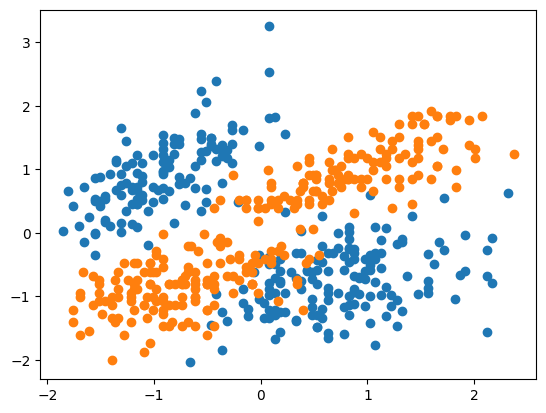

In [173]:
import matplotlib.pyplot as plt

plt.scatter(data_input['bill_depth_mm'], data_input['bill_length_mm'])
plt.scatter(data_input['body_mass_g'], data_input['flipper_length_mm'])


In [174]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(data_input, data_target, random_state=42)

In [175]:
from sklearn.neighbors import KNeighborsClassifier

penguin_kn = KNeighborsClassifier()

In [176]:
train_input.shape

(205, 5)

In [177]:
train_target.shape

(205, 1)

In [178]:
penguin_kn.fit(train_input, train_target['species'])

KNeighborsClassifier()

In [179]:
penguin_kn.score(test_input, test_target['species'])

1.0